### Pratica 2 - Exploração de dados - Parte II

##### Victor Henrique Rodrigues - 9791027
##### Rodrigo Geurgas Zavarizz - 9791080

In [71]:
import pandas as pd
import numpy as np
from sklearn import datasets 

wine = datasets.load_wine()
wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

#temos os vinhos divididos em 3 classes
#wine
#wine.keys() #listando os atributos

In [72]:
wine_atributes = wine[['alcohol', 'flavanoids', 'hue', 'malic_acid', 'magnesium', 'target']]
#wine_atributes

#### Questões sobre o dataset Wine  da pratica anterior:

1. Correlação entre Alcohol, Flavanoides e Hue
    Para verificar a correlação entre as variáveis usamos um scatter plot com todas e plotamos as regressões lineares das possíveis relações e não da para identificar correlação entre as variáveis.
2. Elementos com maior teor alcoólico implicam em elementos com maior quantidade de ácido málico
    Para verificar a hipótese pegamos os 10 linhas com maiores teores alcoólicos e as 10 linhas com maiores quantidades de ácido málico e comparamos as tabelas e concluímos e um não implica o outro.
3. Uma quantidade maior de magnésio causa um hue menor
    Para verificar a hipótese pegamos os 10 linhas com maiores quantidades magnésio e as 10 linhas com menores quantidades de hue e comparamos as tabelas e concluímos e um não implica o outro.

#### Reformulando questões da Pratica anterior:

1. A quantidade de alcool influencia na classe a qual o vinho pertence?
R: A partir do boxplot pode-se observar que para os valores entre o primeiro e o terceiro quartil cuja classe é representada pelo 1.0 podemos dizer que sim. Já para as classes 0.0 e 2.0 podemos também dizer que sim exceto pelos valores próximos do primeiro quartil do target 0.0 e do terceiro quartil do target 2.0, pois há uma leve sobrepoisção dox boxplots nesse ponto. Já considerando os pontos fora desse intervalo não podemos pois há muita sobreposição.
2. O tamanho do intervalo entre o maior e o menor valor de magnésio é próximo em todas as classes?
R: Podemos afirmar que não é por conta da classe 1.0.
3. Os dados hue seguem uma distribuição normal?
R: Não, apesar da obliquidade padronizada dar próximo de 0 o que indica uma distribuição simétrica, a curtose deu negativa, o que indica que os dados estão achatados, o que não segue uma distribuição normal.

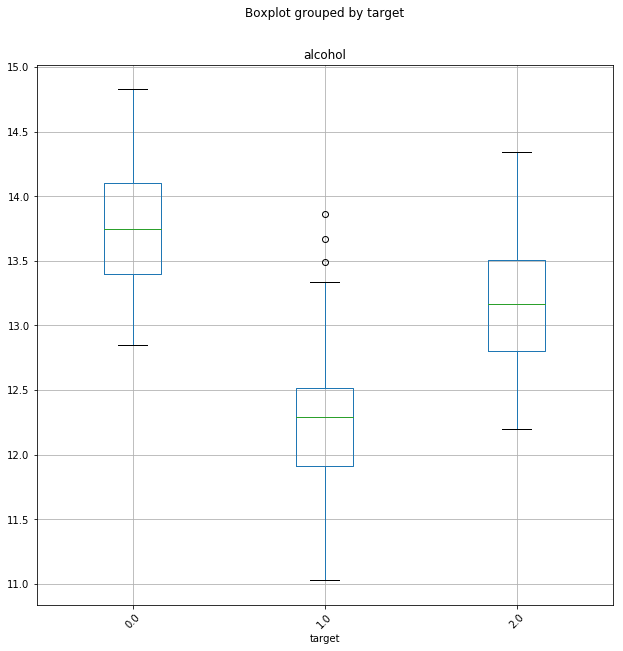

In [73]:
from matplotlib import pyplot as plt

wine_atributes.columns[[0]]
box = wine_atributes.boxplot(column=wine_atributes.columns[[0]].tolist(), rot=45, by='target', figsize=(10,10))
plt.show()

In [75]:
print(wine[wine.target == 0.0].magnesium.max() - wine[wine.target == 0.0].magnesium.min())
print(wine[wine.target == 1.0].magnesium.max() - wine[wine.target == 1.0].magnesium.min())
print(wine[wine.target == 2.0].magnesium.max() - wine[wine.target == 2.0].magnesium.min())

43.0
92.0
43.0


In [76]:
centered = wine.hue - wine.hue.mean()
moment1 = centered.sum()/(len(centered)-1)
moment2 = centered.pow(2).sum()/(len(centered)-1)
moment3 = centered.pow(3).sum()/(len(centered)-1)
moment4 = centered.pow(4).sum()/(len(centered)-1)

print(moment1, moment1/wine.hue.std())
print(moment2, moment2/(wine.hue.std()**2))
print(moment3, wine.hue.skew())
print(moment4, wine.hue.kurt())

5.017957173447035e-17 2.1953549450604088e-16
0.052244960705897285 1.0
0.0002490359543201039 0.021091272199709302
0.00714370926229767 -0.3440957413614769


In [77]:
escolas = pd.read_csv('datasets/instituicoes_ensino_basico/CADASTRO_MATRICULAS_REGIAO_SUDESTE_SP_2012.csv', sep=';', header=11, encoding='latin1')
#escolas

/usr/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Questoes sobre o cadastro de matriculas da regiao sudeste da pratica anterior:
1. Escolas com bibliotecas tendem a ter salas de leitura também
    Como há uma discrepância muito grande em quantidade de escolas com biblioteca e sem biblioteca usamos a porcentagem calculada a partir do número de escolas com ou sem biblioteca e verificamos e há uma porcentagem maior de escolas com sala de leitura sem biblioteca, portanto a hipótese é falsa.
2. Escolas privadas contém um número maior de salas
    Apesar do número total de salas ser maior nas escolas públicas isso se da pelo fato de ter um número maior delas em comparação a escolas privadas, a média em escolas privadas é maior porém a variância da mesma também é, tendo uma consistência menor, podemos dizer que em média as escolas privadas contém um número maior de salas, confirmando a hipótese.
3. Escolas privadas reciclam mais que escolas públicas
    Para verificar tal hipótese usamos a mesma estratégia do item 1, por meio de porcentagens e verificamos que apesar de ambas as escoals privadas quanto as públicas não reclicam muito uma porcentagem maior de escolas privadas reclicam comparado as públicas, confirmando a hipótese.

#### Reformulando questoes da pratica anterior:

1. Há relação entre o número de alunos matriculados em escolas publicas e privadas a partir de um boxplot?
R: O primeiro ponto a ser observado é um número muito grande de outliers na escola privada, mas eles estão no máximo até 1000, o que é aceitável. Mesmo considerando os elementos entre o primeiro e o terceiro quartil há uma diferença muito grande entre o número de alunos.
2. Há discrepancia entre o número min e max de salas em escolas publicas e privadas?
R: Pode-se perceber que o número é próximo (mesmo considerando uma diferença de 10 salas) 
3. A distribuição de número de funcionarios da escola publica segue uma distribuição normal?
R: Não, a distribuição concentra-se mais ao lado direito e é mais alta e concentrada que uma distribuição normal.

In [78]:
escolas = escolas[['MATTOTAL', 'NUM_SALAS_EXISTENTES', 'REDE', 'NUM_FUNCIONARIOS']]
#escolas

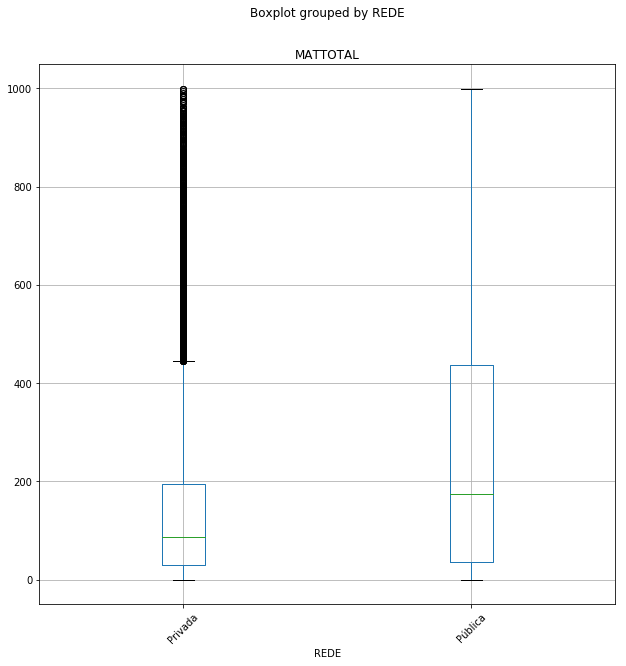

In [79]:
escolas.columns[[0]]
box = escolas.boxplot(column=escolas.columns[[0]].tolist(), rot=45, by='REDE', figsize=(10,10))
plt.show()

In [80]:
print(escolas[escolas.REDE == 'Pública'].NUM_SALAS_EXISTENTES.max() - escolas[escolas.REDE == 'Pública'].NUM_SALAS_EXISTENTES.min())
print(escolas[escolas.REDE == 'Privada'].NUM_SALAS_EXISTENTES.max() - escolas[escolas.REDE == 'Privada'].NUM_SALAS_EXISTENTES.min())

114.0
124.0


In [81]:
numf = escolas[escolas.REDE == 'Pública'].NUM_FUNCIONARIOS

centered = numf - numf.mean()
moment1 = centered.sum()/(len(centered)-1)
moment2 = centered.pow(2).sum()/(len(centered)-1)
moment3 = centered.pow(3).sum()/(len(centered)-1)
moment4 = centered.pow(4).sum()/(len(centered)-1)

print(moment1, moment1/numf.std())
print(moment2, moment2/(numf.std()**2))
print(moment3, numf.skew())
print(moment4, numf.kurt())

-1.848660403014235e-15 -5.775774108728424e-17
955.1676048792837 0.9323644494130799
260625.54126551127 8.525852007311704
386736245.4796749 392.3510470508086


Ao final da pratica, percebemos que o boxplot auxilia a visualização de como os dados se distribuem em torno da mediana, e para verificar a presença de outliers.
O intervalo pode sim causar equivoco caso os extremos sejam outliers, mas isso não ocorreu nos testes realizados. 
Com relação aos momentos, é interessante para avaliar como se dá a distribuição dos dados, ie (se estão centralizados, se estão achatados ou alongados, etc.